In [69]:
import numpy as np
from math import floor,ceil
import matplotlib.pyplot as plt
import mltools as ml 
import matplotlib.cm as colormap
degrees = [1,3,5,7,10,13,15,18] 

In [70]:
data = np.genfromtxt('data/curve80.txt',delimiter=None)         # loading and splitting
X = data[:,0] 
Y = data[:,1]
X = X[:,np.newaxis]

In [38]:
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75)

The transform(x,d) function is basically the 'Phi' function suggested in the hw2, this just takes degree as an extra parameter.

In [64]:
def transform(x,d):
    # add polynomial features and standardize
    x_new,_ = ml.transforms.rescale(ml.transforms.fpoly(x,d,False))
    
    #x_new = ml.transforms.fpoly(x,d,False)    # without rescaling
    return x_new

def plot_curve(x,y,degree):
    # helper function for poly_regression  
    fig,ax = plt.subplots()
    textstr = "The degree of the \n polynomial is {}".format(degree)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    #plt.scatter(X,Y)                                                 #plot of the original data
    plt.scatter(ml.transforms.rescale(X)[0],Y)                                      #plot of rescaled X, and Y 
    plt.plot(x,y,color = 'r')
    plt.show()   
    

The poly_regression function takes the degree as input and plots the curve(which is basically the learner) against the background of the data (original/rescaled) 

In [66]:
def poly_regression(deg):
    # plot curve for a given degree
    
    XtrP,XteP = transform(Xtr,deg),transform(Xte,deg)                   #transforming data
    lr = ml.linear.linearRegress(XtrP,Ytr)                               # training the learner                               
    '''
    YhatTrain = lr.predict(XtrP) 
    YhatTest = lr.predict(XteP)
    training_error = np.mean(np.square(YhatTrain-Ytr))                  #calculating errors    
    test_error = np.mean(np.square(YhatTest-Yte))
    print("Training error is ",training_error,'\n','Test error is ',test_error)
    '''
    x_range = [floor(min(X)),floor(max(X))]                              #range of original and rescaled data
    rescaled_range = [floor(min(ml.transforms.rescale(X)[0])),floor(max(ml.transforms.rescale(X)[0]))]
    
    #xs = np.linspace(x_range[0],x_range[1],200)
    
    xs = np.linspace(rescaled_range[0],rescaled_range[1],200)  
    xs_new = transform(xs[:,np.newaxis],deg)
    y = lr.predict(xs_new)
    plot_curve(xs_new[:,0],y,deg)                   # xs_new[:,0] can be considered the rescaled x axis
    
                  

## Plotting
The box below has the curves along with the curves without any rescaling.  

Training error is  8.030381802487943 
 Test error is  10.793486648728994
[0, 9]


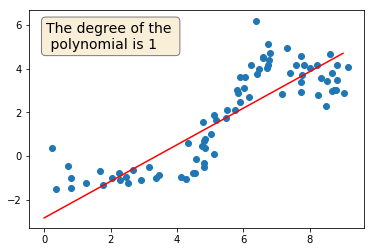

Training error is  8.524128551785287 
 Test error is  9.783472841303672
[0, 9]


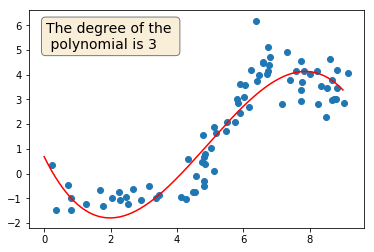

Training error is  8.753844811640043 
 Test error is  10.464531267801403
[0, 9]


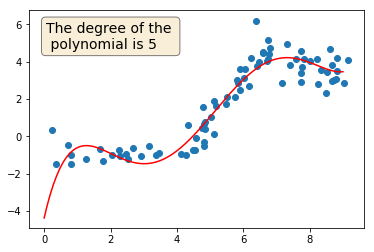

Training error is  8.842459081765124 
 Test error is  10.040478535362034
[0, 9]


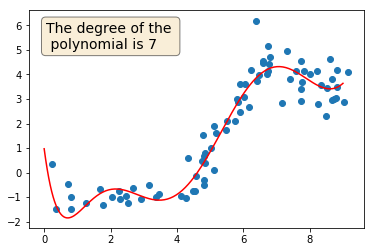

Training error is  8.859148931992827 
 Test error is  10.152811489136223
[0, 9]


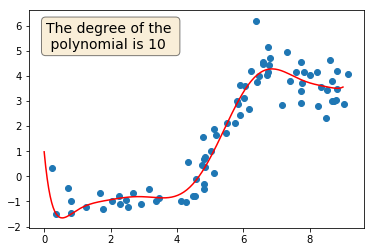

Training error is  8.866409134660584 
 Test error is  10.056477007401623
[0, 9]


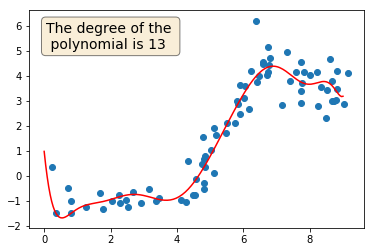

Training error is  8.86858579598553 
 Test error is  10.121541074062648
[0, 9]


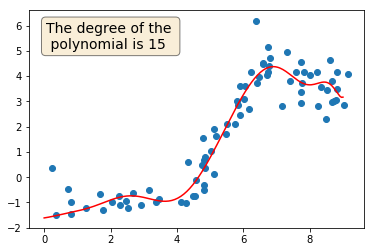

Training error is  8.358357331718855 
 Test error is  8.879027949935507
[0, 9]


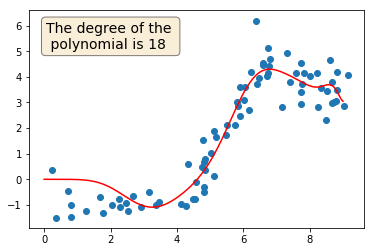

In [28]:
for x in degrees: 
    poly_regression(x)

The box below contains curves trained on the rescaled x axis formed by : 
    
    xs = np.linspace(min_value,max_value,interval) 
    xs = np.linspace(rescaled_range[0],rescaled_range[1],200)  
    xs_new = transform(xs[:,np.newaxis],deg)
    y = lr.predict(xs_new)
    plot_curve(xs_new[:,0],y,deg)                   

The background data is the rescaled data vs Y. 

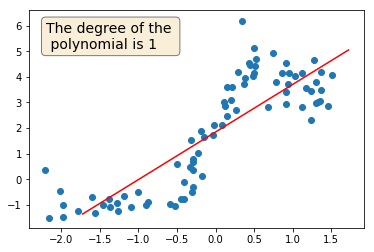

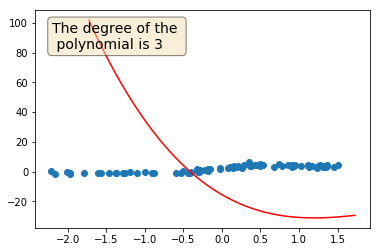

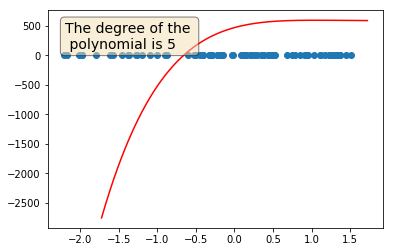

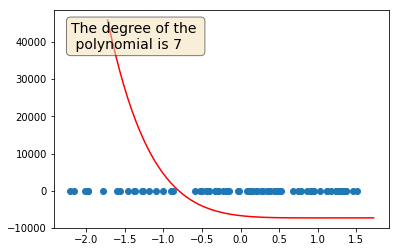

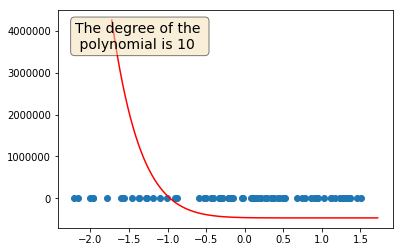

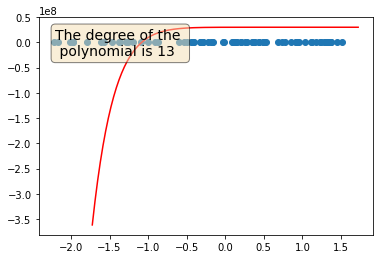

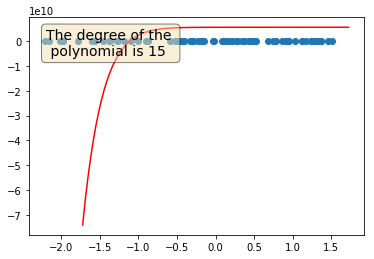

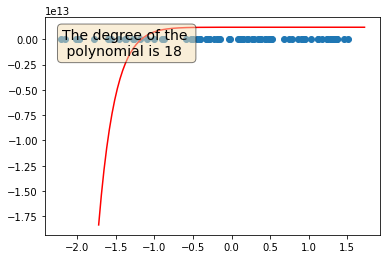

In [68]:

for x in degrees: 
    poly_regression(x)